# The Jansen-Rit Model

In this notebook, the basic use of the implementation of the Jansen-Rit (`jr`) model is presented. 

In the `jr` model, the activity of a particular brain region is defined...

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.jr import JRModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

## Bifurcation diagram

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [28]:
model = JRModel()
model.params['duration'] = 2.0*1000
max_y0 = []
min_y0 = []
max_y1 = []
min_y1 = []
# these are the different input values that we want to scan
p_inputs = np.linspace(-0.5, 1, 100)
for p_ext in p_inputs:
    model.params['p_ext'] = p_ext
    model.run()
    max_y0.append(np.max(model.y0[0, -int(1000/model.params['dt']):]))
    min_y0.append(np.min(model.y0[0, -int(1000/model.params['dt']):]))
    max_y1.append(np.max(model.y1[0, -int(1000/model.params['dt']):]))
    min_y1.append(np.min(model.y1[0, -int(1000/model.params['dt']):]))

Text(0, 0.5, 'Min / max y0')

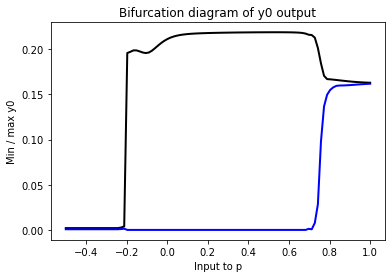

In [29]:
plt.plot(p_inputs, max_y0, c='k', lw = 2)
plt.plot(p_inputs, min_y0, c='b', lw = 2)
plt.title("Bifurcation diagram of y0 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y0")

Text(0, 0.5, 'Min / max y0')

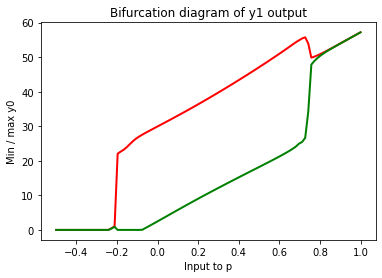

In [30]:

plt.plot(p_inputs, max_y1, c='r', lw = 2)
plt.plot(p_inputs, min_y1, c='g', lw = 2)
plt.title("Bifurcation diagram of y1 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y0")

## Single node simulation

In [32]:
model = JRModel()
model.params['duration'] = 10000
model.params['sigma_ou'] = 0.14
model.run()

Text(0, 0.5, 'Activity in kHz')

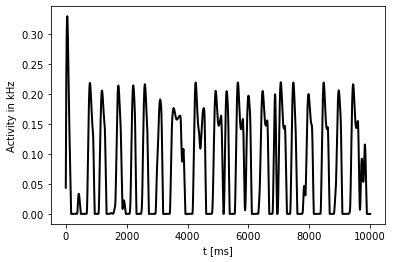

In [33]:
plt.plot(model.t, model.y0.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity in kHz")

Text(0, 0.5, 'LFP')

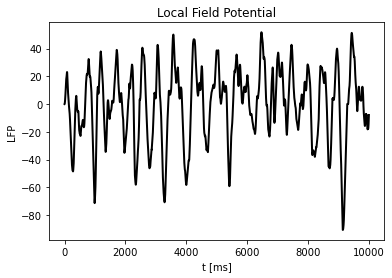

In [35]:

plt.plot(model.t, model.y1.T - model.y2.T, c='k', lw = 2)
plt.title("Local Field Potential")
plt.xlabel("t [ms]")
plt.ylabel("LFP in kHz")

## Brain network

In [8]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [9]:
model = JRModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [10]:
model.params['p_ext'] = 0.65

model.params['signalV'] = 0
model.params['duration'] = 20 * 1000 
model.params['sigma_ou'] = 0.14
model.params['K_gl'] = 3.15


model.run(chunkwise=True)

In [11]:
model.y0.shape

(80, 20000)

(80, 20000)

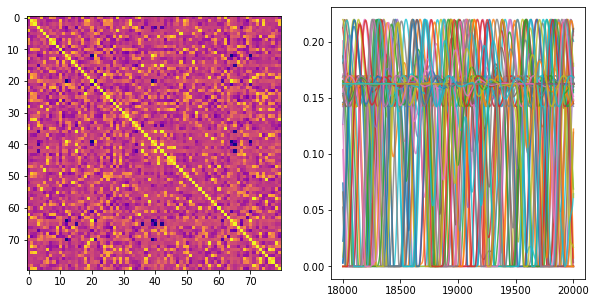

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(func.fc(model.y0[:, -10000:]))
axs[1].plot(model.t, model.y0.T, alpha=0.8);
model.y0.shape

In [13]:
scores = [func.matrix_correlation(func.fc(model.y0[:, -int(5000/model.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['-0.00064', '0.0063', '-0.013', '-0.013', '-0.0035', '-0.0044', '-0.01']
Mean FC/FC correlation: -0.01
